# Electricity used for cooling

In [4]:
# Import libraries
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer

In [5]:
# Read in data
elec_cooling_targets = pd.read_csv("../make_data_files/elec_cooling_use_targets.csv", header = None)
elec_cooling_predictors = pd.read_csv("../make_data_files/elec_cooling_all_predictors.csv")
elec_cooling_targets = elec_cooling_targets[1]/(3.412*elec_cooling_predictors['SQFT'])

In [8]:
# Scale the features
sc = StandardScaler()
elec_cooling_predictors = sc.fit_transform(elec_cooling_predictors)

In [9]:
# Define the grid search loss
def rmse_loss(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared = False)

my_scorer = make_scorer(rmse_loss)

In [12]:
# Grid search for the best model
unique_depths = [3, 5, 7, 9, 12, 15] #, 12, 15, 20]
unique_n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

regressor = RandomForestRegressor()
gsCV = GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': unique_depths, 'n_estimators': unique_n_estimators}, 
                   scoring = my_scorer)
gsCV.fit(elec_cooling_predictors, elec_cooling_targets)

KeyboardInterrupt: 

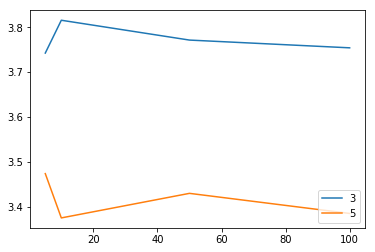

In [11]:
# Plot the grid search results
depths = gsCV.cv_results_['param_max_depth']
n_estimators = gsCV.cv_results_['param_n_estimators']
scores = gsCV.cv_results_['mean_test_score']

for depth in unique_depths:
    depth_constant_scores = scores[depths == depth]
    plt.plot(unique_n_estimators, depth_constant_scores, label = depth)

plt.legend(loc = "lower right")

plt.show()